## **Bike Sharing**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **1. Business Problem Understanding**

### **Context**

Bike Sharing adalah layanan transportasi bersama di mana sepeda konvensional atau sepeda listrik disediakan untuk digunakan bersama oleh individu dalam jangka pendek dengan harga tertentu atau gratis. 

Pengguna dapat mengambil sepeda di sekitar kota dari beberapa stasiun yang memiliki dok atau tanpa dok dan mengembalikannya di sistem yang sama. Dock adalah rak sepeda khusus yang mengunci sepeda, dan hanya dapat dilepaskan dengan kontrol komputer, sementara dock-less bike share tidak memerlukan stasiun dok, sepeda dapat diparkir di dalam rak sepeda yang telah ditentukan atau di sepanjang trotoar. Bike sharing menyediakan sarana transportasi yang mudah, murah, dan efisien bagi penduduk lokal dan wisatawan untuk berkeliling kota. 

Sistem berbagi sepeda sering kali difasilitasi melalui aplikasi seluler atau kartu keanggotaan, yang memungkinkan pengguna untuk menemukan dan membuka kunci sepeda, melacak penggunaannya, dan melakukan pembayaran. 

Statistik pasar bike sharing telah menyaksikan pertumbuhan yang signifikan dalam beberapa tahun terakhir, didorong oleh meningkatnya urbanisasi, fokus pada pilihan transportasi yang berkelanjutan, dan popularitas layanan mobilitas bersama.

### **Problem Statement**

Salah satu tantangan bagi perusahaan bike sharing adalah pemecahan  masalah untuk dapat memiliki model bisnis yang menguntungkan secara finansial bagi perusahaan, serta bisa memberikan pengalaman positif terhadap penyewa sepeda.

Mengingat bisnis bike sharing ini sangat tergantung pada kualiatas sepeda dan ketersediaan sepeda di lapangan yang digunakan oleh penyewa sepeda setiap harinya, Namun keputusan yang tidak tepat bisa menimbulkan masalah serius terhadap perusahaan, menyediakan sepeda yang terlalu banyak bisa mengakibatkan penurunan revenue dan tingginya biaya maintenance, begitu pula jika kebutuhan sepeda tidak terpenuhi bisa menurunkan kepuasan penyewa dan hilangnya pengguna mengingat bahwa persaingan ketat dengan perusahaan lain sangat tinggi.



### **Goal**

oleh karena itu untuk meminimalisir biaya maintance dan bisa meningkatkan revenue perusahaan ingin memprediksi penggunaan sepeda yang produktif dan tidak, sehingga mengurangi pembengkakan biaya akibat sepeda yang berlebih dan kekurangan sepeda ketika penyewa sedang banyak. 

Maka perusahaan memerlukan tools yang bisa membantu perusahaan untuk menentukan unit yang harus disediakan sesuai dengan jumlah customer yang membutuhkan, sehingga bisa meningkatkan revenue dan menurunkan biaya maintenance akibat penumpukan unit yang tidak digunakan

### **Analytical Approach**

Untuk memenuhi kebutuhan tersebut, perlu dilakukan analisis data yang tersedia agar menemukan pola dari setiap fitur yang ada, sehingga bisa membuat pemodelan prediksi yang sesuai dengan kebutuhan perusahaan untuk menentukan unit yang disediakan berdasarkan kondisi yang terjadi. 

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi Kebutuhan Unit , yang mana akan berguna untuk perusahaan dalam menentukan jumlah unit yang dibutuhkan sesuai tingkat permintaan customer.

### **Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi kebutuhan unit sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

## **2. Data Understanding**

- Dataset merupakan data bike sharing dari tahun 2011-2012
- Setiap baris data merepresentasikan informasi terkait penyewaan sepeda

### **Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Date  |
| hum | Float | Normalized humidity (the values are divided to 100) |
| weathersit | Integer | 1: Clear, Few clouds, Partly cloudy, Partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|
| holiday | integer | holiday or not |
| season | integer | season 1: winter 2: spring 3: summer 4: fall |
| atemp | Float | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale) |
| temp | Float | normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale) |
| hr | Integer |hour (0 to 23) |
| casual | Integer | count of casual users |
| registered | Integer | registered users |
| cnt | Integer | count of total rental bikes including both casual and registered |

<br>

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

import warnings
warnings.filterwarnings('ignore')

### **Data Description**

In [2]:
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
#Menampilkan Total Nilai Unik dan Nilai unik dari tiap kolom
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
unique_values

,Column Name,Number of Unique,Unique Sample
0,dteday,731,"[2011-12-09, 2012-06-17, 2011-06-15, 2012-03-31, 2012-07-31, 2012-10-01, 2012-08-28, 2012-01-01, 2011-10-13, 2012-06-09, 2011-06-28, 2011-12-21, 2012-01-31, 2012-02-07, 2012-05-15, 2011-01-04, 2012-02-27, 2012-08-21, 2011-02-13, 2012-07-09, 2012-12-18, 2011-06-07, 2012-09-26, 2012-08-20, 2011-02-17, 2012-05-08, 2012-06-26, 2011-09-02, 2011-03-29, 2012-06-16, 2011-09-17, 2011-07-10, 2011-02-02, 2012-09-23, 2011-02-25, 2011-03-12, 2011-05-09, 2012-08-26, 2011-03-31, 2012-03-22, 2012-08-24, 2012-05-31, 2012-09-08, 2011-06-25, 2011-10-09, 2011-05-05, 2012-05-14, 2012-07-22, 2011-04-02, 2012-02-04, 2012-10-22, 2012-02-23, 2012-03-08, 2011-07-23, 2012-01-17, 2012-06-22, 2012-10-06, 2012-10-15, 2011-04-07, 2012-01-03, 2011-07-18, 2011-10-19, 2011-12-26, 2011-08-10, 2011-11-07, 2012-12-17, 2012-03-02, 2011-02-26, 2011-08-22, 2011-03-02, 2012-01-28, 2011-10-16, 2011-12-02, 2012-02-18, 2012-11-16, 2011-11-06, 2012-05-18, 2011-04-22, 2011-01-30, 2011-08-06, 2011-07-30, 2011-01-28, 2011-02-18, 2011-04-15, 2011-11-30, 2012-01-26, 2012-06-04, 2011-11-24, 2012-11-27, 2011-01-22, 2012-04-02, 2012-07-15, 2011-03-23, 2011-12-31, 2011-03-09, 2012-01-11, 2011-02-24, 2011-01-29, 2012-01-08, 2012-04-05, ...]"
1,hum,89,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.93, 1.0, 0.24, 0.78, 0.6, 0.38, 0.52, 0.8, 0.37, 0.3, 0.83, 0.94, 0.61, 0.73, 0.35, 0.41, 0.74, 0.49, 0.33, 0.44, 0.77, 0.89, 0.88, 0.66, 0.7, 0.71, 0.63, 0.57, 0.43, 0.39, 0.45, 0.48, 0.5, 0.34, 0.19, 0.36, 0.65, 0.81, 0.79, 0.27, 0.29, 0.67, 0.75, 0.76, 0.31, 0.4, 0.28, 0.69, 0.08, 0.32, 0.51, 0.46, 0.59, 0.58, 0.23, 0.84, 0.82, 0.47, 0.18, 0.25, 0.42, 0.86, 0.0, 0.68, 0.56, 0.16, 0.21, 0.97, 0.85, 0.26, 0.22, 0.2, 0.17, 0.1, 0.15, 0.13, 0.9, 0.92, 0.96, 0.91, 0.12, 0.14]"
2,weathersit,4,"[1, 2, 3, 4]"
3,holiday,2,"[0, 1]"
4,season,4,"[4, 2, 3, 1]"
5,atemp,65,"[0.3485, 0.5152, 0.6212, 0.697, 0.4545, 0.6515, 0.2727, 0.6061, 0.4394, 0.2576, 0.5455, 0.2273, 0.6667, 0.4091, 0.3939, 0.6364, 0.5303, 0.5, 0.3636, 0.7424, 0.3333, 0.4242, 0.5758, 0.4697, 0.5909, 0.7576, 0.6818, 0.303, 0.7727, 0.1212, 0.803, 0.3182, 0.2121, 0.7879, 0.197, 0.1515, 0.4848, 0.1818, 0.3788, 0.0909, 0.2879, 0.2424, 0.5606, 0.1667, 0.7121, 0.7273, 0.0303, 0.8333, 0.8636, 0.8788, 0.1364, 0.1061, 0.8485, 0.8182, 0.0455, 0.8939, 0.9242, 0.0152, 0.0758, 0.0606, 0.9545, 0.9091, 0.0, 1.0, 0.9848]"
6,temp,50,"[0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82, 0.66, 0.44, 0.58, 0.28, 0.22, 0.4, 0.38, 0.68, 0.56, 0.72, 0.52, 0.6, 0.34, 0.42, 0.64, 0.24, 0.48, 0.8, 0.32, 0.16, 0.74, 0.88, 0.3, 0.14, 0.9, 0.18, 0.06, 0.2, 0.5, 0.08, 0.78, 0.84, 0.04, 0.86, 0.12, 0.94, 0.1, 0.92, 0.96, 0.02, 0.98, 1.0]"
7,hr,24,"[16, 4, 23, 8, 18, 0, 22, 9, 5, 7, 14, 15, 21, 20, 11, 3, 13, 19, 6, 12, 1, 2, 10, 17]"
8,casual,305,"[24, 2, 17, 19, 99, 6, 20, 13, 219, 1, 11, 9, 0, 110, 51, 7, 10, 45, 30, 87, 5, 15, 60, 49, 122, 254, 81, 80, 220, 46, 36, 14, 3, 48, 31, 310, 32, 72, 26, 21, 142, 245, 16, 8, 58, 126, 47, 62, 12, 93, 27, 74, 28, 55, 50, 132, 68, 75, 29, 18, 168, 57, 61, 283, 148, 43, 4, 138, 264, 71, 121, 41, 186, 44, 39, 237, 225, 226, 224, 118, 22, 170, 162, 35, 54, 84, 200, 116, 117, 38, 53, 65, 37, 25, 196, 78, 113, 66, 33, 253, ...]"
9,registered,742,"[226, 16, 90, 126, 758, 39, 196, 27, 5, 315, 20, 278, 273, 127, 74, 48, 192, 110, 223, 652, 432, 808, 188, 119, 32, 157, 118, 141, 49, 134, 21, 227, 437, 50, 101, 23, 212, 1, 142, 171, 474, 8, 83, 233, 155, 370, 41, 43, 4, 88, 156, 99, 169, 400, 237, 7, 72, 59, 109, 228, 17, 148, 6, 26, 73, 100, 247, 91, 293, 95, 222, 383, 168, 79, 176, 146, 216, 369, 220, 22, 338, 3, 11, 123, 180, 112, 42, 181, 618, 209, 374, 467, 128, 179, 67, 104, 33, 413, 14, 19, ...]"


## **3. Exploratory Data Analysis (EDA)**

### **Distribusi Data Numerical Features**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


Dilihat dari data diatas bahwa ada beberapa kolom yang tidak sesuai tipe datanya, maka dari itu, kita akan merubah tipe data terlebih dahulu agar data yang dikeluarkan sesuai.

In [6]:
# Mengubah Tipe data kolom "dteday" menjadi datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [7]:
# mengubah tipe data kolom weathersit, holiday, dan season
df= df.astype({
    'weathersit': 'object',
    'holiday':'object',
    'season' : 'object',
})

In [8]:
df.describe()

,dteday,hum,atemp,temp,hr,casual,registered,cnt
count,12165,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,2012-01-01 02:04:45.869297408,0.625451,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
min,2011-01-01 00:00:00,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 00:00:00,0.470000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,0.620000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,2012-07-03 00:00:00,0.780000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,2012-12-31 00:00:00,1.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000
std,NaN,0.192102,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903


In [9]:
numerical_features = df[['hum', 'atemp', 'temp','casual','registered','cnt']]
numerical_features.head()

,hum,atemp,temp,casual,registered,cnt
0,0.62,0.3485,0.36,24,226,250
1,0.64,0.5152,0.54,2,16,18
2,0.53,0.6212,0.62,17,90,107
3,0.87,0.3485,0.36,19,126,145
4,0.55,0.6970,0.76,99,758,857


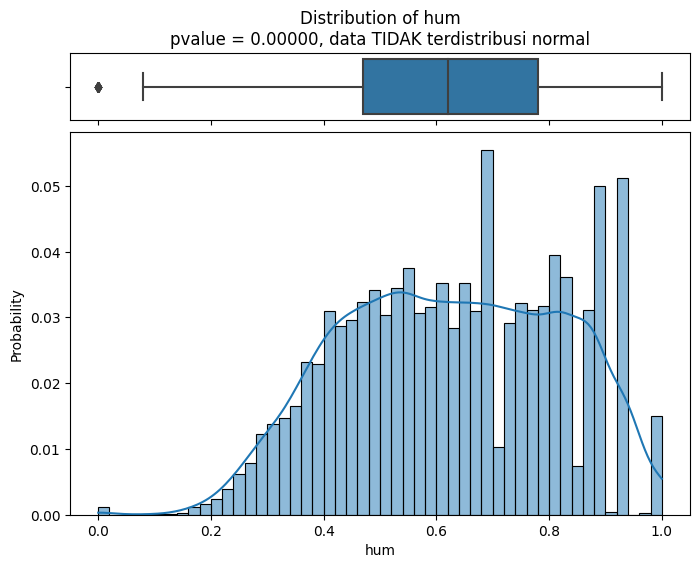

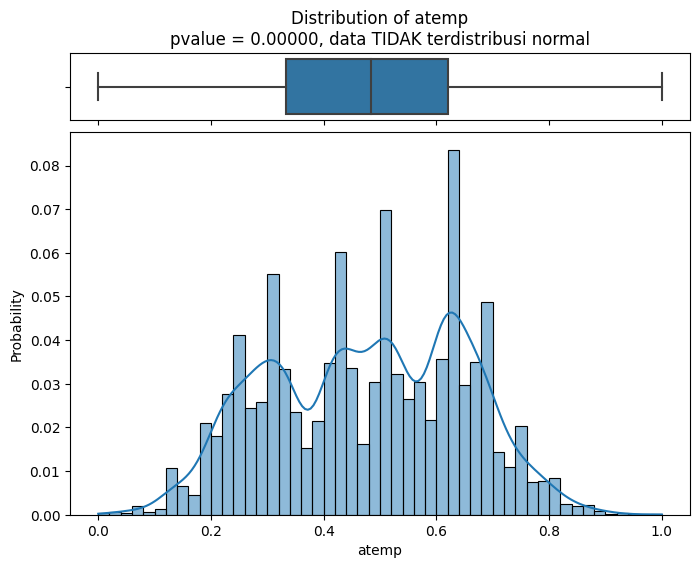

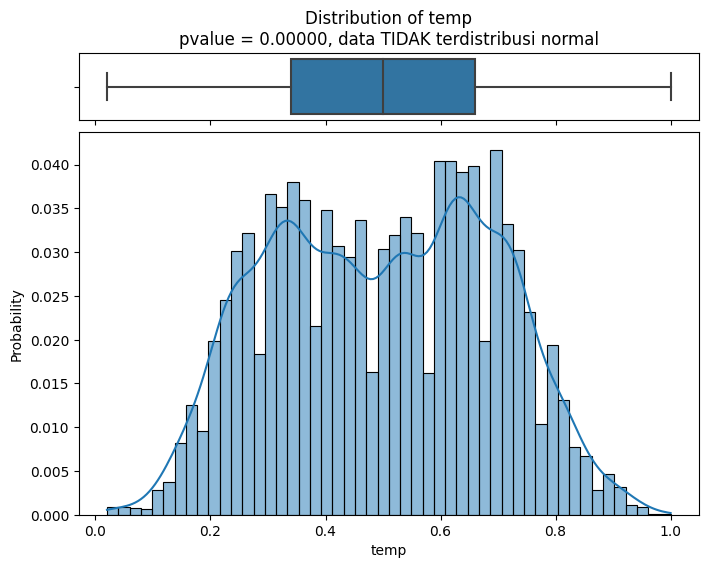

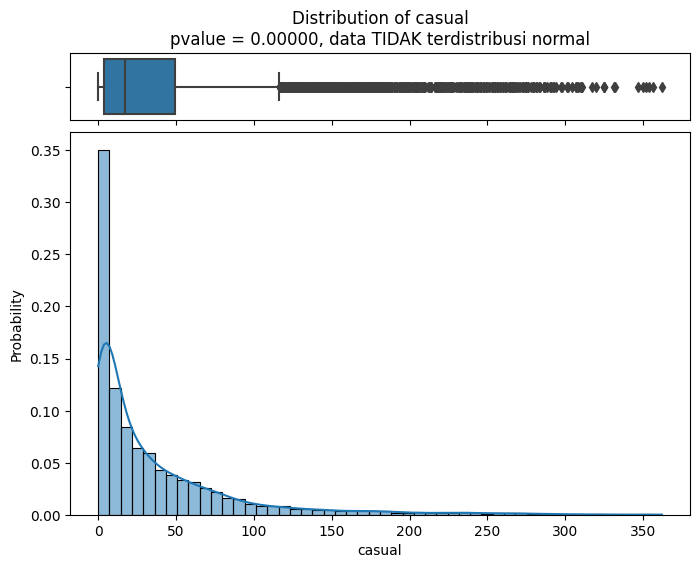

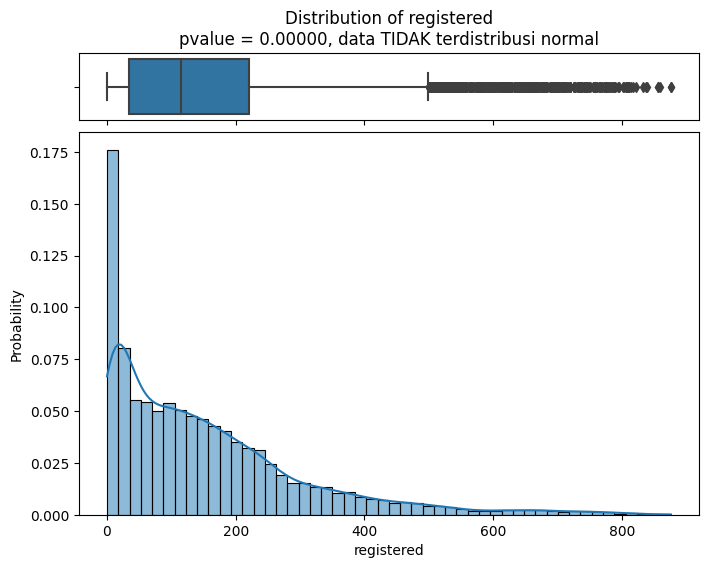

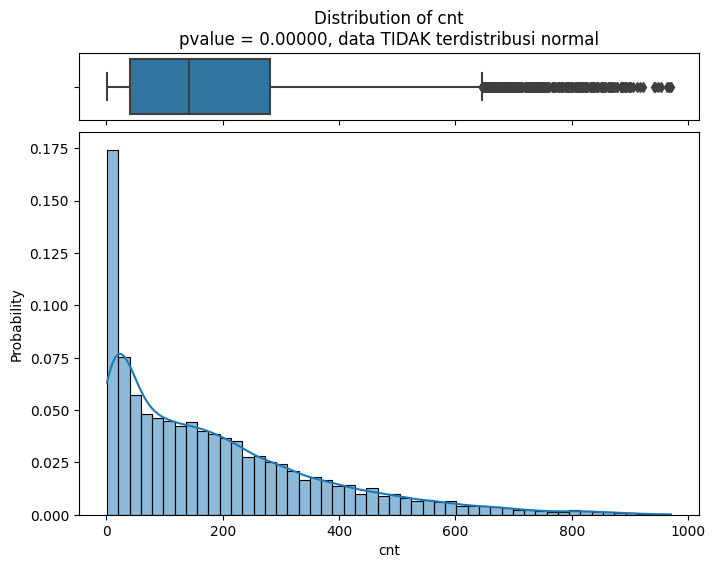

In [10]:
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (8,6), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "probability", kde=True, bins=50)

    plt.show()

Berdasarkan dari grafik plot diatas kita bisa melihat bahwa :
1. Pada fitur 'hum' (Humidity) memiliki distribusi data tidak normal (left skewed), dan   terdapat outlier
2. Pada fitur 'atemp' memiliki distribusi data tidak normal (right skewed), dan tidak terdapat outlier.
3. Pada fitur 'temp' memiliki distribusi data tidak normal (right skewed), dan tidak terdapat outlier
4. Pada fitur 'casual' memiliki distribusi data tidak normal(right skewed), dan terdapat outlier
5. Pada fitur 'registered' memiliki distribusi data tidak normal (right skewed), dan terdapat outlier
6. Pada fitur 'cnt' memiliki distribusi datai tidak normal (right skewed), dan ter dapat outlier

Dilihat dari distribusi data yang tidak normal dan beberapa fitur memiliki outlier makan untuk skala pemodelan akan menggunakan Robust Scaler agar hasil skala lebih stabil.
 

### **Correlation Numerical Features**

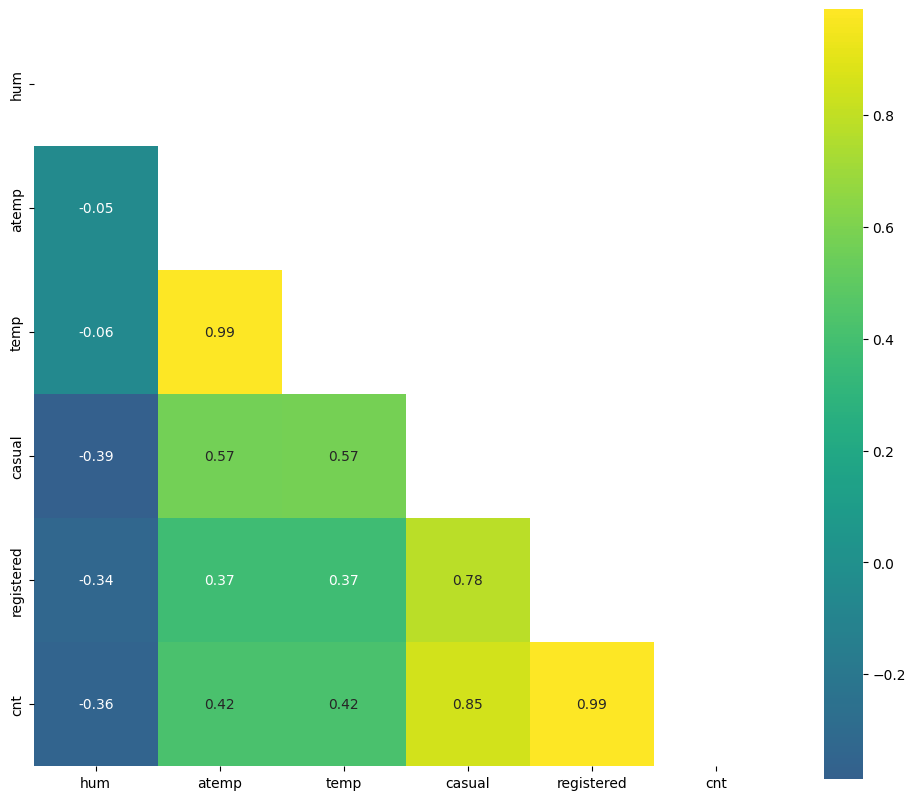

In [11]:
plt.figure(figsize=(12,10))

matrix = np.triu(numerical_features.corr(method='spearman',numeric_only=True))

sns.heatmap(data=numerical_features.corr(method='spearman',numeric_only=True), annot=True, fmt='.2f', cmap='viridis', center=0, mask = matrix, square='True')
plt.show()

Correlation matrix menunjukan bahwa ada fitur yang memiliki korelasi yang kuat terhadap fitur count ('cnt'), yaitu 'casual' dan 'registered'. Hal ini menunjukan adanya multicolinearity. Artinya, variabel-variabel tersebut saling terkait secara linear. Karena pada dasarnya fitur `cnt` adalah jumlah dari fitur `casual` dan `registered`, maka selanjutnya untuk kedua fitur tersebut akan dihapus.

Selanjutnya kita akan mengecek frekuensi dari fitur categorical.

### **Proporsi Categorical Features**

In [12]:
df.describe(include=object)

,weathersit,holiday,season
count,12165,12165,12165
unique,4,2,4
top,1,0,3
freq,8071,11803,3169


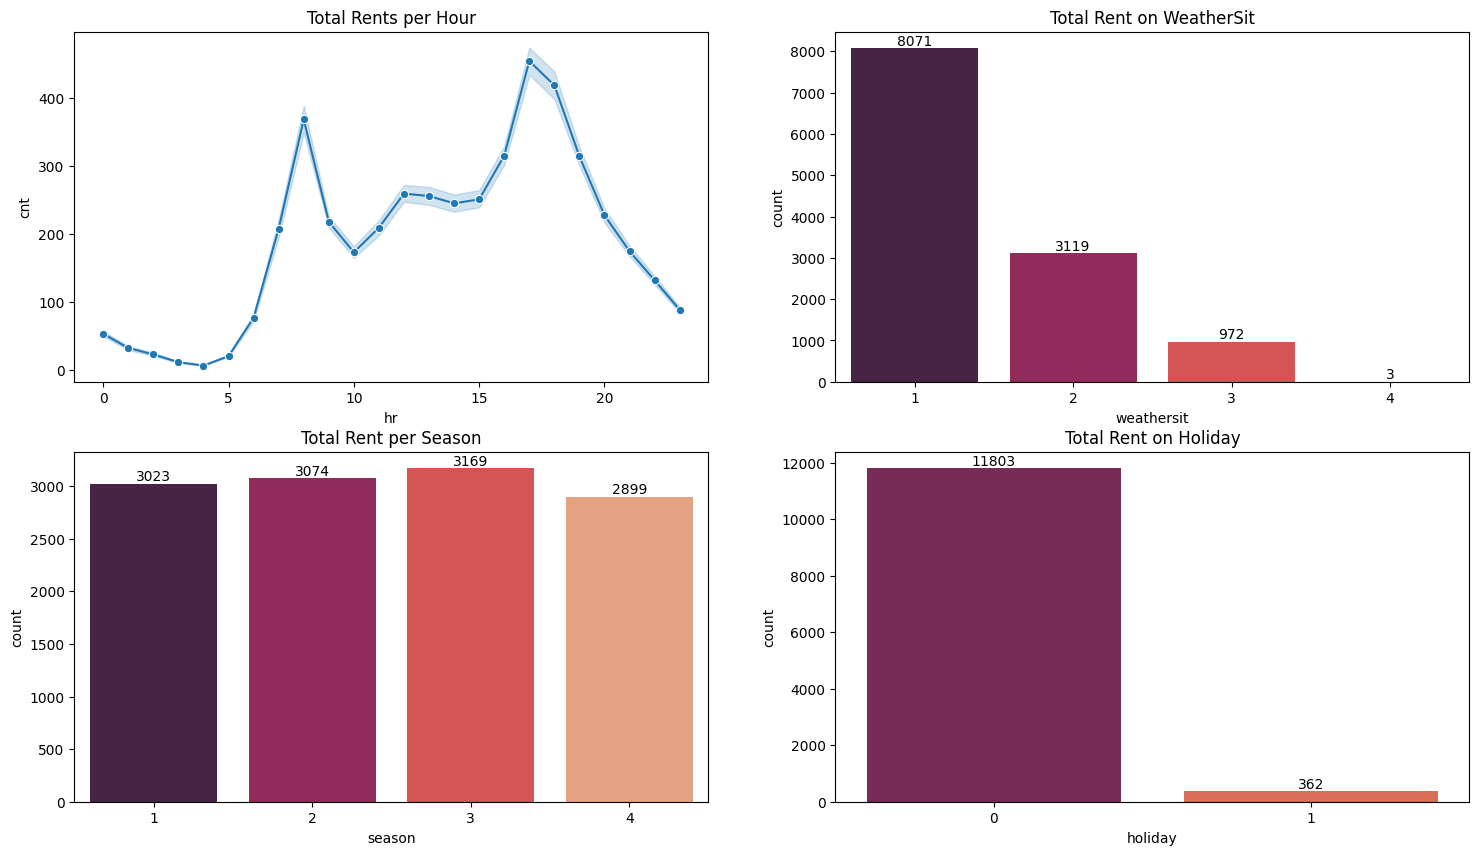

In [13]:
plt.figure(figsize = (18,10))
plt.subplot(2,2,4)
ax = sns.countplot(data=df, x='holiday', palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Total Rent on Holiday', size = 12)

plt.subplot(2,2,3)
ax = sns.countplot(data=df, x='season', palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Total Rent per Season', size = 12)

plt.subplot(2,2,2)
ax = sns.countplot(data= df,x='weathersit', palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Total Rent on WeatherSit', size = 12)

plt.subplot(2,2,1)
sns.lineplot(data=df, x='hr', y='cnt', marker='o', palette='rocket')
plt.title('Total Rents per Hour', size = 12)

plt.show()

Berdasarkan grafik diatas, dapat dilihat bahwa :
1. Total penyewaan mulai meningkat pada jam 7 hingga jam 6 sore.
2. Total penyewaan terbanyak terjadi pada cuaca sedang cerah sekitar 8071, berbeda signifikan dibandingkan pada saat suaca lainnya.
3. Total penyewaan terbanyak pada musim panas, walaupun perbedaan pada setiap musim tidak terlalu signifikan
4. Total penyewaan terbanyak pada hari kerja, dan pada hari libur sangat sedikit yang menyewa sepeda hanya 362. 

## **4. Data Prepocessing**

Pada tahap ini, kita akan melakukan cleaning data untuk memastikan bahwa dataset yang akan digunakan dalam analisis lebih lanjut bersih dan siap untuk digunakan. Beberapa langkah yang perlu ditempuh adalah :
- Check Missing Value
- Check Data Duplicates
- Replace Value
- Generate New Features
- Remove Irrelevant Feature
- Rename Features
- Handling Outliers

### **Check Missing Values**

In [14]:
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

### **Check Data Duplicates**

In [15]:
df.duplicated().sum()

0

### **Replace Value**

In [16]:
# Mengubah Tipe data kolom "dteday" menjadi datetime
df['dteday'] = pd.to_datetime(df['dteday'])

### **Generate New Features**

Agar mendapatkan hasil analisis dan pemodelan terbaik, maks fitur `dteday` akan digenerate menjadi fitur baru berupa hari bulan dan tahun.

In [17]:
# Mengubah tipe data dteday

df['dteday'] = pd.to_datetime(df['dteday'])

# Melihat hari dari kolom dteday
df['day'] = df['dteday'].dt.day_name()
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year

# Mengubah tipe data feature 'holiday', 'year', dan 'month' menjadi category
df = df.astype({
    'year': 'object',
    'holiday' : 'object',
    'month' :'object'
})


In [18]:
# Mengubah value kolom 'season' dan 'weathersit' dari numerik menjadi penamaan kategori yang sesuai
df['season'] = df['season'].replace({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'})
df['weathersit'] = df['weathersit'].replace({1:'Clear', 2:'Cloudy', 3:'Light snow/Light Rain', 4:'Heavy Rain/Snow'})
df['holiday'] = df['holiday'].replace({1:'Holiday', 0:'Not Holiday'})
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,day,month,year
0,2011-12-09,0.62,Clear,Not Holiday,Fall,0.3485,0.36,16,24,226,250,Friday,12,2011
1,2012-06-17,0.64,Clear,Not Holiday,Spring,0.5152,0.54,4,2,16,18,Sunday,6,2012
2,2011-06-15,0.53,Clear,Not Holiday,Spring,0.6212,0.62,23,17,90,107,Wednesday,6,2011
3,2012-03-31,0.87,Cloudy,Not Holiday,Spring,0.3485,0.36,8,19,126,145,Saturday,3,2012
4,2012-07-31,0.55,Clear,Not Holiday,Summer,0.6970,0.76,18,99,758,857,Tuesday,7,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,Clear,Not Holiday,Winter,0.2273,0.24,7,14,243,257,Wednesday,1,2012
12161,2012-07-06,0.62,Clear,Not Holiday,Summer,0.7424,0.78,0,39,63,102,Friday,7,2012
12162,2012-02-20,0.60,Cloudy,Holiday,Winter,0.2121,0.24,5,0,6,6,Monday,2,2012
12163,2012-03-31,0.77,Cloudy,Not Holiday,Spring,0.4242,0.42,2,14,55,69,Saturday,3,2012


### **Remove Irrelevant Feature**

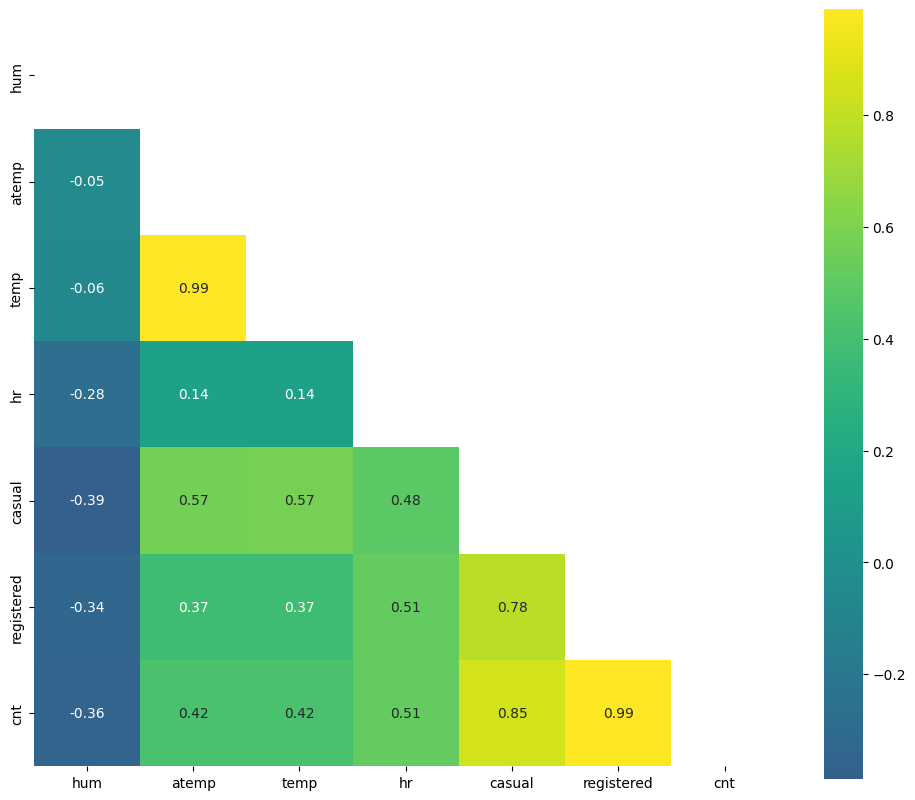

In [19]:
plt.figure(figsize=(12,10))

matrix = np.triu(df.corr(method='spearman',numeric_only=True))

sns.heatmap(data=df.corr(method='spearman',numeric_only=True), annot=True, fmt='.2f', cmap='viridis', center=0, mask = matrix, square='True')
plt.show()

Dilihat dari grafik heat map diatas bahwa : 
1. Fitur Atemp dan temp memiliki korelasi yang kuat, maka fitur tersebut akan dihapus
2. Fitur registered memiliki korelasi yang kuat dengen fitur cnt, maka fitur tersebut akan dihapus.
3. Fitur casual memiliki korelasi yang kuat dengan fitur cnt, maka fitur tersebut akan dihapus.
4. fitur 'hum' memiliki korelasi negatif terhadap cnt, yang artinya adalah kelembaban yang semakin tinggi menurunkan jumlah penyewaan sepeda.

Selanjutnya mari kita lihat multicolinearity menggunakan VIF(Variance Inflation Factor), yang mana jika ada fitur yang memiliki nilai lebih tinggi dari 10 makan akan di drop.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calc_vif(numerical):
    vif = pd.DataFrame()
    vif["variables"] = numerical.columns
    vif["VIF"] = [variance_inflation_factor(numerical.values, i) for i in range(numerical.shape[1])]
    return(vif)

In [21]:
calc_vif(df[['hum', 'atemp', 'temp', 'cnt']])

,variables,VIF
0,hum,5.789306
1,atemp,335.560402
2,temp,305.111029
3,cnt,2.625439


Terlihat bahwa skor VIF pada fitur `atemp` dan `temp` sangat tinggi, Hal ini mengindikasi adanya multikolinearity pada 2 fitur tersebut. Maka salah satu kolom harus di drop. maka fitur `atemp` yang memiliki skor paling tinggi (335) yang akan di drop.

In [22]:
df.drop(columns=['atemp'], axis = 1, inplace=True)

Kemudian apada fitur `dteday` karena sudah di jadikan fitur baru yaitu `day`, `month` dan `year`, Maka fitur `dteday` sudah tidak diperlukan lagi dan di drop. Begitu juga dengan fitur `casual` yang merupakan jumlah penyewa yang tidak terdaftar (bukan member), dan fitur `registered` yang merupakan jumlah penyewa yang sudah terdaftar(member) sudah termasuk di dalam nilai fitur `cnt` maka kedua fitur tersebut tidak akan di gunakan dan di drop.

In [23]:
df.drop(columns=['dteday','casual','registered'], axis = 1, inplace = True)

### **Rename Features**

Selanjutnya untuk memudahkan pemahaman dalam setiap fitur, maka saya akna meruba semua nama pada fitur yang nanti akan di analisa dan dibuat modelingnya.

In [24]:
df.rename({
    'hum' : 'Humidity',
    'weathersit':'Weather',
    'holiday':'Holiday',
    'season':'Season',
    'temp':'Temperature',
    'hr':'Hour',
    'cnt':'Count',
    'day':'Day',
    'month':'Month',
    'year':'Year'
}, inplace=True, axis=1)

df

,Humidity,Weather,Holiday,Season,Temperature,Hour,Count,Day,Month,Year
0,0.62,Clear,Not Holiday,Fall,0.36,16,250,Friday,12,2011
1,0.64,Clear,Not Holiday,Spring,0.54,4,18,Sunday,6,2012
2,0.53,Clear,Not Holiday,Spring,0.62,23,107,Wednesday,6,2011
3,0.87,Cloudy,Not Holiday,Spring,0.36,8,145,Saturday,3,2012
4,0.55,Clear,Not Holiday,Summer,0.76,18,857,Tuesday,7,2012
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,Clear,Not Holiday,Winter,0.24,7,257,Wednesday,1,2012
12161,0.62,Clear,Not Holiday,Summer,0.78,0,102,Friday,7,2012
12162,0.60,Cloudy,Holiday,Winter,0.24,5,6,Monday,2,2012
12163,0.77,Cloudy,Not Holiday,Spring,0.42,2,69,Saturday,3,2012


### **Handling Outliers**

Dalam tahap ini akan melihat data outlier pada fitur yang memilikinya, dan jika dirasa tidak relevan dan mempengaruhi kualitas analisis dan modeling kedepannya. 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     12165 non-null  float64
 1   Weather      12165 non-null  object 
 2   Holiday      12165 non-null  object 
 3   Season       12165 non-null  object 
 4   Temperature  12165 non-null  float64
 5   Hour         12165 non-null  int64  
 6   Count        12165 non-null  int64  
 7   Day          12165 non-null  object 
 8   Month        12165 non-null  object 
 9   Year         12165 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 950.5+ KB


In [26]:
numerical_features = df[['Humidity','Temperature','Hour','Count']].describe().columns

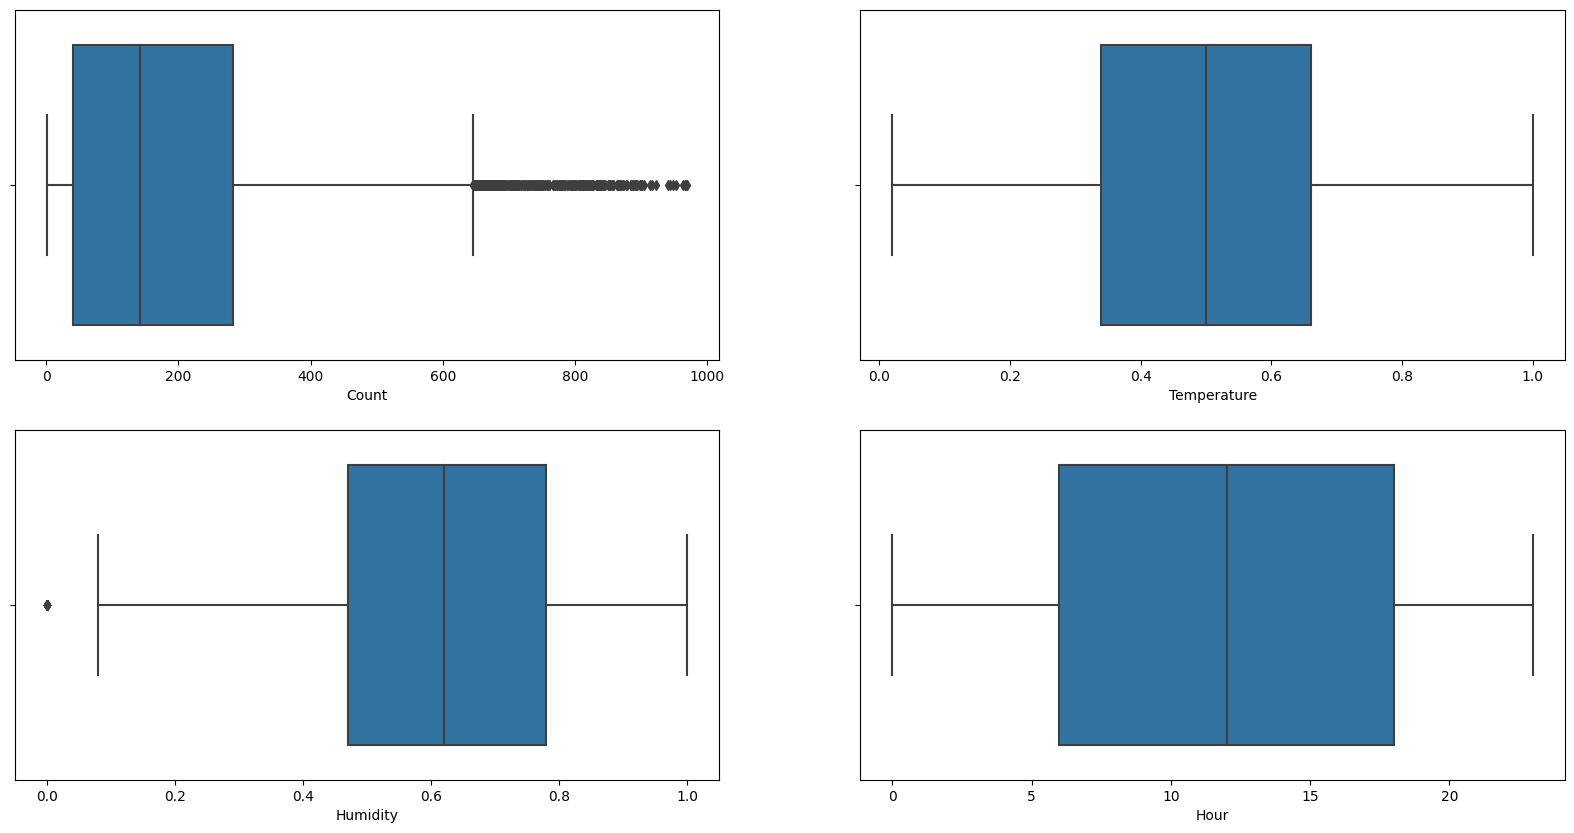

In [27]:
# Plot boxplot untuk mengecek outliers
fig, axes = plt.subplots(2,2, figsize=(20,10))
sns.boxplot(data=df, x=df['Count'], ax=axes[0][0])
sns.boxplot(data=df, x=df['Temperature'], ax=axes[0][1])
sns.boxplot(data=df, x= df['Humidity'], ax=axes[1][0])
sns.boxplot(data=df, x= df['Hour'], ax=axes[1][1])
plt.show()

Dari grafik boxplot diatas, terlihat bahwa pada fitur `cnt` dan `humidity` dan kita akan melihat lebih jauh data outlier pada 2 fiture tersebut.

In [28]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,Humidity,0.005,1.245,14,12151,0,0.12
1,Temperature,-0.140,1.140,0,12165,0,0.00
2,Hour,-12.000,36.000,0,12165,0,0.00
3,Count,-323.000,645.000,0,11827,338,2.78


Dalam persentase, terlihat bahwa pada fitur `Humidity` terdapat nilai outlier 'lower' sebanyak 14 data, yang artinya ada yang menyewa pada saat humidity dibawah 0.05 atau 0 derajat. Kita nilai bahwa data ini tidak relevan dan dikhawatirkan akan mempengaruhi pemodelan maka untuk itu data akan di hapus.

In [29]:
df[df['Humidity'] == 0.0]

,Humidity,Weather,Holiday,Season,Temperature,Hour,Count,Day,Month,Year
345,0.0,Light snow/Light Rain,Not Holiday,Winter,0.38,7,37,Thursday,3,2011
871,0.0,Light snow/Light Rain,Not Holiday,Winter,0.44,15,14,Thursday,3,2011
1645,0.0,Light snow/Light Rain,Not Holiday,Winter,0.34,0,3,Thursday,3,2011
3239,0.0,Cloudy,Not Holiday,Winter,0.44,17,111,Thursday,3,2011
3717,0.0,Cloudy,Not Holiday,Winter,0.34,22,34,Thursday,3,2011
4924,0.0,Light snow/Light Rain,Not Holiday,Winter,0.36,6,12,Thursday,3,2011
7285,0.0,Light snow/Light Rain,Not Holiday,Winter,0.34,1,2,Thursday,3,2011
7760,0.0,Light snow/Light Rain,Not Holiday,Winter,0.42,12,34,Thursday,3,2011
8412,0.0,Light snow/Light Rain,Not Holiday,Winter,0.38,8,44,Thursday,3,2011
8960,0.0,Light snow/Light Rain,Not Holiday,Winter,0.34,23,27,Thursday,3,2011


In [30]:
# Drop feature 'humidity' yang memiliki nilai 0
df = df[df['Humidity']!=0]

Data outlier pada fitur `Humidity` sudah dihapus, selanjutnya kita lihat data outlier pada fitur `Count`, dilihat dari tabel di atas terdapat sebanyak 338 data yang memiliki nilai diatas upper fence. Berdasarkan domain knowledge makan nilai outlier diatas upper fence akan dihapus karena akan mempengaruhi analisis dan pemodelan.

In [31]:
# Mengecek outliers pada feature 'count'

q1 = df['Count'].quantile(0.25)
q3 = df['Count'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5
print(f'IQR: {iqr}')

down_fence = q1 - limit
upper_fence = q3 + limit
print(f'limit_bawah: {down_fence}')
print(f'limit_atas: {upper_fence}')  

IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0


In [32]:
# Cek count > 645
df[df['Count']>645]

,Humidity,Weather,Holiday,Season,Temperature,Hour,Count,Day,Month,Year
4,0.55,Clear,Not Holiday,Summer,0.76,18,857,Tuesday,7,2012
20,0.94,Clear,Not Holiday,Fall,0.38,8,662,Tuesday,12,2012
22,0.73,Clear,Not Holiday,Fall,0.56,8,838,Wednesday,9,2012
34,0.33,Clear,Not Holiday,Fall,0.60,16,691,Sunday,9,2012
43,0.55,Clear,Not Holiday,Summer,0.80,12,694,Saturday,9,2012
...,...,...,...,...,...,...,...,...,...,...
12006,0.73,Cloudy,Not Holiday,Spring,0.62,8,713,Wednesday,6,2012
12017,0.58,Cloudy,Not Holiday,Fall,0.40,17,723,Wednesday,10,2012
12023,0.57,Clear,Not Holiday,Winter,0.64,18,801,Monday,3,2012
12027,0.39,Clear,Not Holiday,Fall,0.52,17,943,Tuesday,10,2012


In [33]:
# Menghapus Outlier
df = df.drop(df[df['Count'] > 645].index)

**Clean Dataset**

In [34]:
df.head()

,Humidity,Weather,Holiday,Season,Temperature,Hour,Count,Day,Month,Year
0,0.62,Clear,Not Holiday,Fall,0.36,16,250,Friday,12,2011
1,0.64,Clear,Not Holiday,Spring,0.54,4,18,Sunday,6,2012
2,0.53,Clear,Not Holiday,Spring,0.62,23,107,Wednesday,6,2011
3,0.87,Cloudy,Not Holiday,Spring,0.36,8,145,Saturday,3,2012
5,0.72,Clear,Not Holiday,Fall,0.46,0,45,Monday,10,2012


## **5. Data Analysis**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11813 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     11813 non-null  float64
 1   Weather      11813 non-null  object 
 2   Holiday      11813 non-null  object 
 3   Season       11813 non-null  object 
 4   Temperature  11813 non-null  float64
 5   Hour         11813 non-null  int64  
 6   Count        11813 non-null  int64  
 7   Day          11813 non-null  object 
 8   Month        11813 non-null  object 
 9   Year         11813 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1015.2+ KB


### **a. Numerical Variables vs Target**

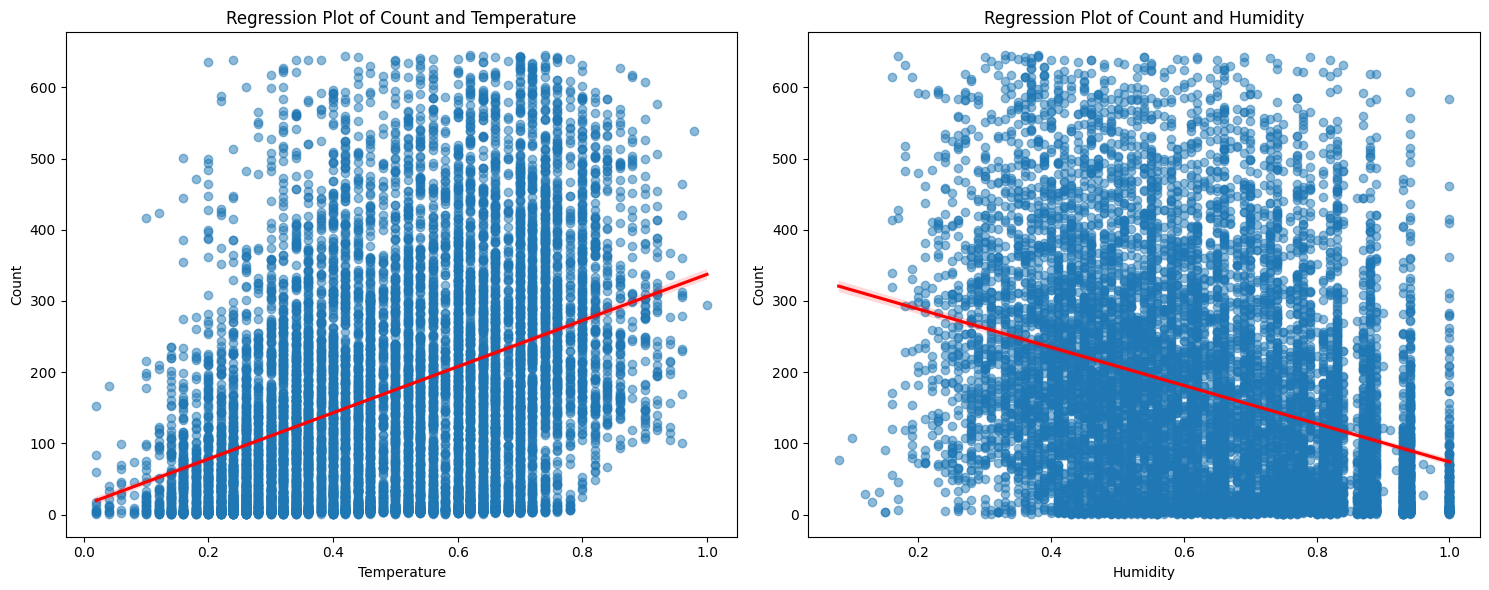

In [36]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.regplot(data=df, y='Count', x='Temperature', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression Plot of Count and Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')

# Regresi plot untuk 'Humidity' dan 'Count'
plt.subplot(1, 2, 2)
sns.regplot(data=df, y='Count', x='Humidity', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression Plot of Count and Humidity')
plt.xlabel('Humidity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas dapat dapat kita interpretasikan bahwa :

- Pada suhu yang rendah, jumlah penyewaan sepeda cenderung rendah. Hal ini karena pada suhu yang rendah, orang cenderung kurang beraktivitas di luar ruangan.
- Pada suhu yang tinggi, jumlah penyewaan sepeda cenderung tinggi. Hal ini karena pada suhu yang tinggi, orang cenderung lebih beraktivitas di luar ruangan, dan sepeda merupakan salah satu alat transportasi yang efisien dan ramah lingkungan.
- kelembaban (sumbu x) tidak memiliki hubungan yang kuat dengan jumlah penyewaan sepeda (sumbu y). Artinya, perubahan kelembaban tidak berpengaruh signifikan terhadap jumlah penyewaan sepeda.
- Hal ini dapat dijelaskan dengan teori bahwa kelembaban tidak terlalu berpengaruh terhadap keinginan orang untuk beraktivitas di luar ruangan. Orang tetap dapat beraktivitas di luar ruangan, meskipun dengan tingkat kelembaban yang tinggi.
- Selanjutnya mari kita lihat korelasi antar fiturnya.

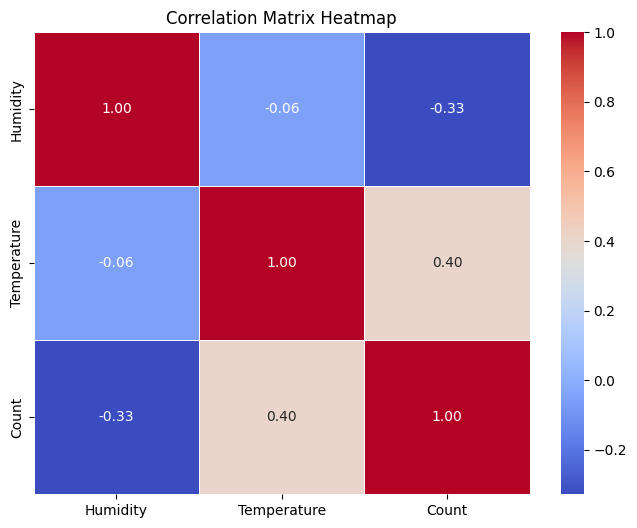

In [37]:
numerical_features = ['Humidity', 'Temperature', 'Count']

# Matriks korelasi
correlation_matrix = df[numerical_features].corr()

# Heatmap untuk matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Dapat dilihat bahwa hubungan fitur `Humidity`, `Temperature`, dan `Count`, dimana hubungan antara fitur `Humidity` dan `Count` memiliki korelasi moderate negatif, artinya semakin kelembaban menurun maka rata sewa sepeda akan meningkat. 

Dan pada fitur `Temperature` memiliki korelasi moderate positif, artinya semakan tinggi temperature maka semakin tinggi juga sewa sepeda. Namun, kita perlu melihat dengan fitur lainnya agar hasil analisis lebih spesifik. Selanjutnya, kita akan melihat hubungan antara fitur kategorical dengan fitur `Count`.

### **b.Categorical Variables vs Target**

In [38]:
df.describe(include='object')

,Weather,Holiday,Season,Day,Month,Year
count,11813,11813,11813,11813,11813,11813
unique,4,2,4,7,12,2
top,Clear,Not Holiday,Summer,Saturday,5,2011
freq,7802,11452,3043,1715,1024,6044


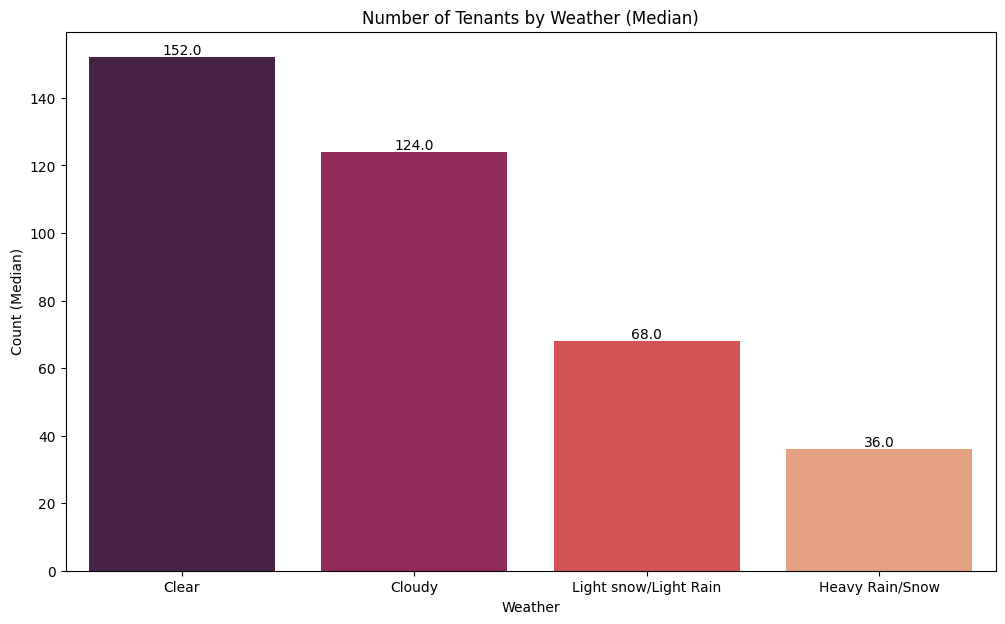

In [39]:
weather_count = df.groupby('Weather')['Count'].median().reset_index().sort_values('Count',ascending=False)

# Bar plot untuk median 'Count' dengan angka pada setiap bar berdasarkan 'Weather'
plt.figure(figsize=(12, 7))
sns.barplot(data=weather_count, x='Weather', y='Count', palette='rocket', label='Count')

# Menambahkan angka pada setiap bar
for i, txt in enumerate(weather_count['Count']):
    plt.text(i, txt, str(txt), ha='center', va='bottom')

plt.title('Number of Tenants by Weather (Median)')
plt.xlabel('Weather')
plt.ylabel('Count (Median)')
plt.show()

Berdasarkan grafik diatas dapat disimpulkan bahwa da hubungan signifikan antara cuaca dan rata-rata penyewaan sepeda. Bisa kita lihat bahwa :

- Cuaca cerah memiliki rata-rata penyewaan sepeda tertinggi yaitu 152 unit.
- Cuaca berawan memiliki rata-rata penyewaan sepeda yang lebih rendahm yaitu 124unit.
- Cuaca gerimis memiliki rata-rata penyewaan sepeda sebesar 68 unit.
- Cuaca hujan lebat memiliki rata-rata penyewaan sepeda sebesar 36 unit.

Secara umum, fitur cuaca memiliki pengaruh yang tinggi terhadap penyewaan sepeda

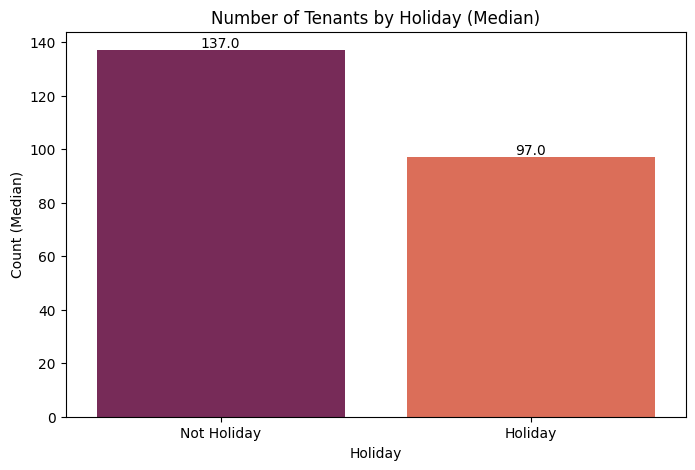

In [40]:
holiday_count = df.groupby('Holiday')['Count'].median().reset_index().sort_values('Count', ascending=False)

# Bar plot untuk median 'Count' dengan angka pada setiap bar berdasarkan 'Holiday'
plt.figure(figsize=(8, 5))
sns.barplot(data=holiday_count, x='Holiday', y='Count', palette='rocket', label='Count')

# Menambahkan angka pada setiap bar
for i, txt in enumerate(holiday_count['Count']):
    plt.text(i, txt, str(txt), ha='center', va='bottom')

plt.title('Number of Tenants by Holiday (Median)')
plt.xlabel('Holiday')
plt.ylabel('Count (Median)')
plt.show()

Dari grafik diatas terlihat bahwa rata-rata penyewaan sepeda tertinggi ada pada hari kerja, ini menunjukan bahwa sebagian besar penyewaan sepeda dilakuakn untuk beraktifitas seperti bekerja, pergi kesekolah dan kegiatan lainnya. dan sepeda menjadi alternatif sarana transportasi. Dengan nilai rata-rata 137 unit, ini menunjukan bahwa tinggi kebutuhan sepeda pada hari kerja lebih tinggi dibandingkan saat hari libur yang hanya sebesar 97 unit.

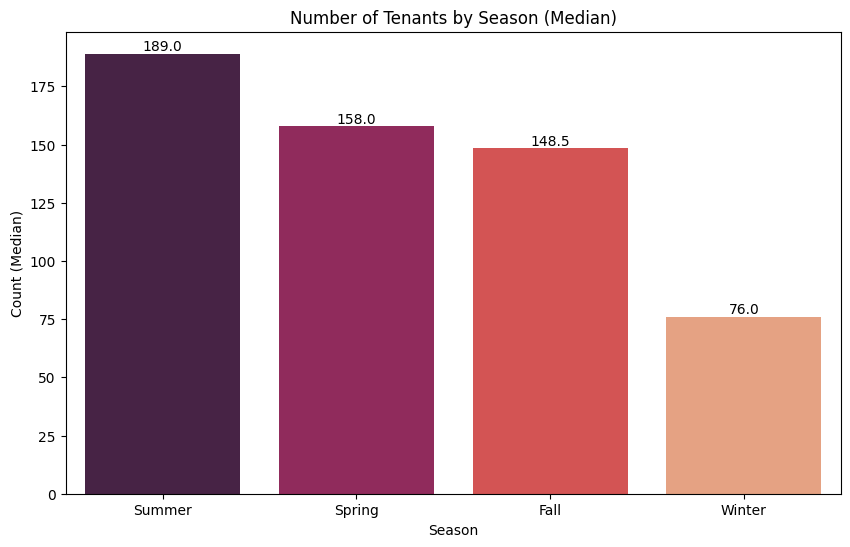

In [41]:
season_count = df.groupby('Season')['Count'].median().reset_index().sort_values('Count', ascending=False)

# Bar plot untuk median 'Count' dengan angka pada setiap bar berdasarkan 'Season'
plt.figure(figsize=(10, 6))
sns.barplot(data=season_count, x='Season', y='Count', palette='rocket', label='Count')

# Menambahkan angka pada setiap bar
for i, txt in enumerate(season_count['Count']):
    plt.text(i, txt, str(txt), ha='center', va='bottom')

plt.title('Number of Tenants by Season (Median)')
plt.xlabel('Season')
plt.ylabel('Count (Median)')
plt.show()

Terlihat dari grafik diatas bahwa penyewaan sepeda tertinggi pada saat musim Summer dengan rata-rata penyewaan sebesar 189 unit, disusul dengan musim Spring dengan rat-rata 158 unit, dan pada musim Fall terlihat sedikit penurunan penyewaan sebesar 148.5 unit. Sedangakan pada musim Winter menjadi jumlah penyewaan paling sedikit dengan rata-rata sebesar 76 unit, dapat disimpulkan bahwa pada misum Fall orang jarang melakukan aktifitas luar dan lebih memilih berdiam diri dirumah.

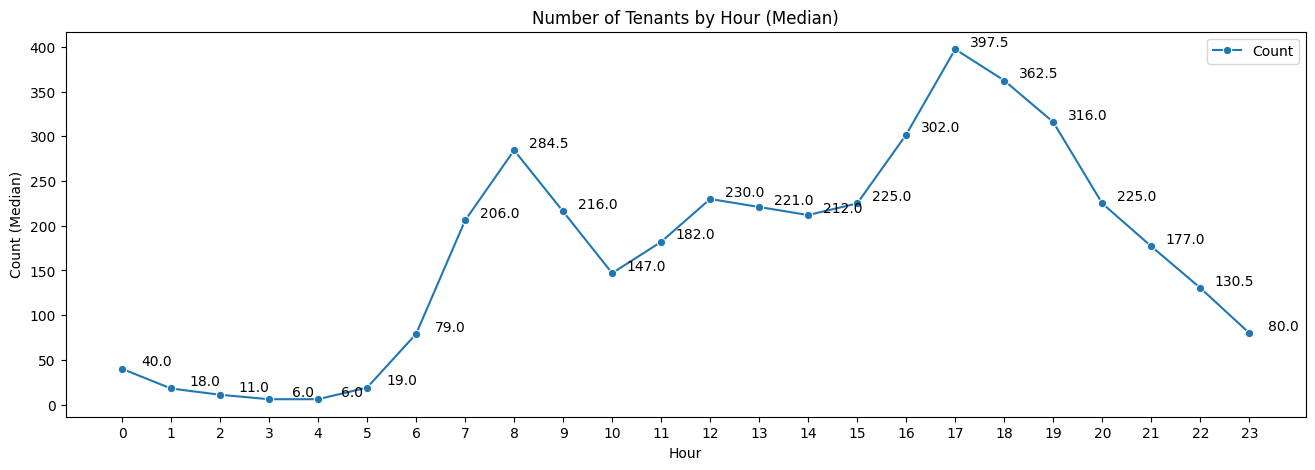

In [42]:
hour_count = df.groupby('Hour')[['Count']].median().reset_index()

# Line plot untuk median 'Count' dengan angka pada setiap marker berdasarkan bins jam (interval 1 jam)
plt.figure(figsize=(16, 5))
sns.lineplot(data=hour_count, x='Hour', y='Count', marker='o', label='Count')

# Menambahkan angka pada setiap marker
for i, txt in enumerate(hour_count['Count']):
    plt.text(hour_count['Hour'][i]+0.7, txt, str(txt), ha='center', va='bottom')

plt.title('Number of Tenants by Hour (Median)')
plt.xlabel('Hour')
plt.ylabel('Count (Median)')
plt.xticks(range(24))  # Menetapkan ticks untuk setiap jam
plt.legend()
plt.show()

Dari grafik diatas terlihat bahwa terjadi peningkatan signifikan penyewaan sepeda mulai jam 7 hingga jam 8 pagidari 206 unit ke 284.5 unit, ini menunjukan bahwa penyewa tertinggi dipagi hari untuk melakukan aktifitas pagi seperti berangkat kerja, sekolah atau aktifitas lainnya, kemudian terjadi lonjakan lagi pada saat sore mulai jam 16.00 ke jam 18.00 sebesar 302 ke 397.5 unit.

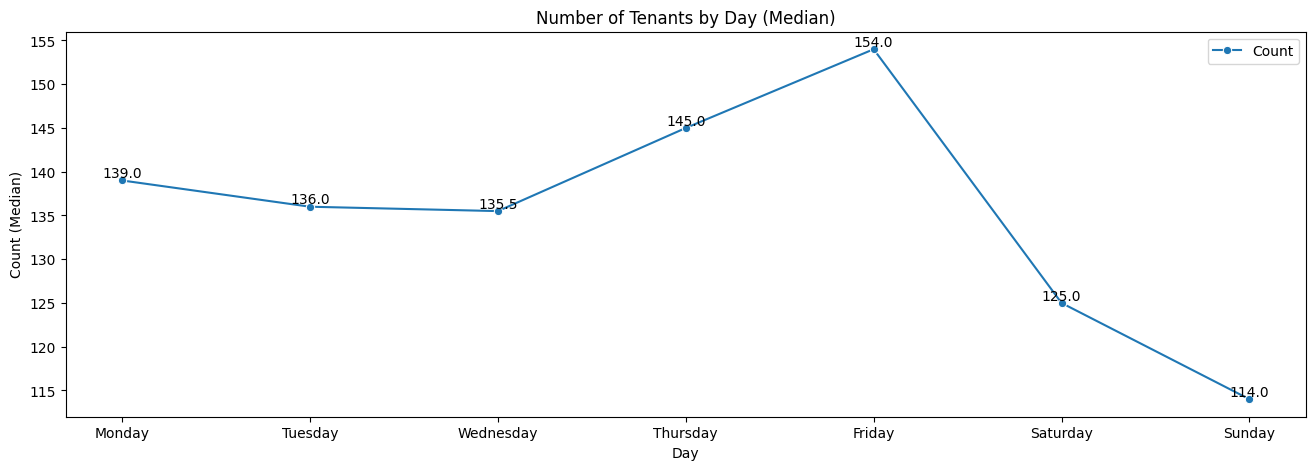

In [43]:
Day_Count = df.groupby('Day')[['Count']].median().reset_index()

# Menentukan urutan yang diinginkan untuk kolom 'Day'
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Mengonversi 'Day' ke tipe kategori dengan urutan yang diinginkan
Day_Count['Day'] = pd.Categorical(Day_Count['Day'], categories=desired_order, ordered=True)

# Line plot untuk median 'Count' dengan angka pada setiap marker berdasarkan 'Day'
plt.figure(figsize=(16, 5))
sns.lineplot(data=Day_Count, x='Day', y='Count', marker='o', label='Count')

# Menambahkan angka pada setiap marker
for i, txt in enumerate(Day_Count['Count']):
    plt.text(Day_Count['Day'][i], txt, str(txt), ha='center', va='bottom')

plt.title('Number of Tenants by Day (Median)')
plt.xlabel('Day')
plt.ylabel('Count (Median)')
plt.legend()
plt.show()

Berdasarkan grafik diatas, median penyewaan sepeda tertinggi ada pada hari jumat, yaitu 154 unit. Hal ini menunjukan haru jumat merupakan hari dengan jumlah penyewa sepeda terbanyak. Terjadi penurunan secara signifikan pada hari sabtu dan minggu. ini menunjukan bahwa pada hari tersebut orang akan cenderung diam di rumah dan istirahat dibandingkan beraktifitas diluar. Keadaaan paling rendah ada pada hari minggu dengan median 114 unit.

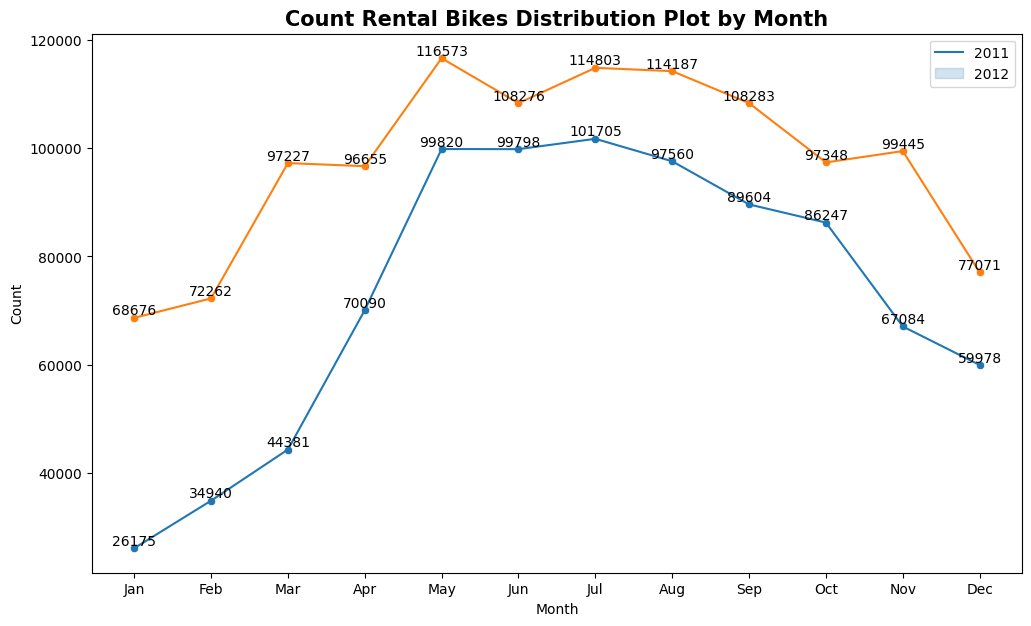

In [44]:
# Contoh DataFrame
# Gantilah dengan DataFrame yang sesuai dengan data Anda
df_2011 = df[df['Year'] == 2011].groupby('Month').sum()
df_2012 = df[df['Year'] == 2012].groupby('Month').sum()

plt.figure(figsize=(12, 7))

sns.lineplot(data=df_2011, x='Month', y='Count')
sns.scatterplot(data=df_2011, x='Month', y='Count')

# Menambahkan angka pada marker untuk 2011
for i, row in df_2011.iterrows():
    plt.text(i, row['Count'], str(row['Count']), ha='center', va='bottom')

# Line plot untuk 2012
sns.lineplot(data=df_2012, x='Month', y='Count')
sns.scatterplot(data=df_2012, x='Month', y='Count')

# Menambahkan angka pada marker untuk 2012
for i, row in df_2012.iterrows():
    plt.text(i, row['Count'], str(row['Count']), ha='center', va='bottom')

plt.legend(['2011', '2012'])
plt.title('Count Rental Bikes Distribution Plot by Month', size=15, weight='bold')
plt.xlabel('Month')
plt.ylabel('Count')

# Menetapkan label bulan pada sumbu x
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

Grafik diatas menunjukan bahwa jumlah penyewaan sepeda berfluktuasi secara signifikan dari bulan ke bulan. Jumlah penyewaan sepeda paling tinggi pada bulan-bulan mmusim panas, yaitu juni, juli, dan agustus. Jumlah penyewaan sepeda paling rendah pada bulan-bulan musim dingin, yaitu Januari, februari dan maret. Kemudian, Jumlah penyewaan pada tahun 2012 lebih banyak dibandingkan dengean bulan 2011 di bulan yang sama.

Berdasarkan grafik tersebut, dapat disimpulkan bahwa cuaca merupakan faktor yang mempengaruhi jumlah penyewaan sepeda. bisa kita lihat bahwa jumlah penyewaan sepeda tertinggi ada pada bulan Mei 2012 dengan jumlah 116.573, ini mengalami peningkatan dibandingkan dengan Mei 2011 dengan jumlah 99.820.

Selanjutnya, kita membuat pemodelan machine learnign untuk memprediksi ketersediaan unit berdasarkan data yang sudah kita analisis.



## **6. Modeling**

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
warnings.filterwarnings("ignore")

### **a. Data Preparation**

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [46]:
categorical_features = df.describe(include='object').columns
categorical_features

Index(['Weather', 'Holiday', 'Season', 'Day', 'Month', 'Year'], dtype='object')

In [47]:
# menampilkan jumlah unik dan unique values untuk setiap kolom
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in categorical_features :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,Weather,4,"[Clear, Cloudy, Heavy Rain/Snow, Light snow/Light Rain]"
1,Holiday,2,"[Holiday, Not Holiday]"
2,Season,4,"[Fall, Spring, Summer, Winter]"
3,Day,7,"[Friday, Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday]"
4,Month,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
5,Year,2,"[2011, 2012]"


In [48]:
df['Day'].value_counts()

Day
Saturday     1715
Wednesday    1706
Sunday       1701
Friday       1685
Thursday     1671
Tuesday      1670
Monday       1665
Name: count, dtype: int64

In [49]:
# Mendefinisikan urutan ordinal untuk encoder ordinal
ordinal_mapping = {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Weather', 'Holiday', 'Season', 'Year']),
    ('Ordinal', OrdinalEncoder(categories=[list(ordinal_mapping.keys())]), ['Day'])
], remainder='passthrough')

### **b. Define Features and Target**

In [50]:
# Define Features (X)
X = df.drop(columns=['Count'],axis=1)

# Define Label (y)
y = df['Count']

### **c. Data Spliting**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### **d. Model Benchmarking**

In [52]:
# Menentukan algoritma yang akan digunakan
linreg = LinearRegression()
knn = KNeighborsRegressor()
dtree = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

In [53]:
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_linreg = TransformedTargetRegressor(linreg, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dtree = TransformedTargetRegressor(dtree, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

#define scaler
scaler = RobustScaler()

# Kandidat algoritma
models = [log_linreg, log_knn, log_dtree, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-143.65547497 -143.12618851 -133.66684484 -148.92442824 -140.06463122] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -97.51679994  -96.698796    -91.46647037 -101.07191479  -94.12395368] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.25030677 -1.35685066 -1.45594182 -1.3333311  -1.36597447] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())


[-97.34272066 -96.74216809 -90.94615315 -96.1049454  -95.38075756] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-61.38445911 -59.1470608  -59.06788198 -61.2572431  -61.06475913] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.79441328 -0.75913514 -0.89854524 -0.80331442 -0.92448183] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-65.39696558 -63.46863499 -60.83873088 -66.3717399  -67.97396341] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=0))
[-38.63844151 -37.03905526 -35.29606184 -38.60424906 -38.62580608] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=De

In [54]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'RMSE': nilai_mean_rmse,
    'MAE': nilai_mean_mae,
    'MAPE': nilai_mean_mape,
}).sort_values('RMSE',ascending=False)

,Model,RMSE,MAE,MAPE
4,XGBoost Regressor,-42.216193,-25.644474,-0.272758
3,RandomForest Regressor,-47.234111,-27.981161,-0.293809
2,DecisionTree Regressor,-64.810007,-37.640723,-0.409362
1,KNN Regressor,-95.303349,-60.384281,-0.835978
0,Linear Regression,-141.887514,-96.175587,-1.352481


Terdapat perbedaan cukup signifikan antara nilai RMSE dna MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal in menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar, Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoitma yang digunakan, shingga ada perbedaan signifikan antara nilai RMSE dan MAR.

- Berdasarkan nilai RMSE, MAE dan MAPE, SGBoost adalah model terbaik. dan nilai paling rendah adalalah model Linear Regression.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost.

In [55]:
xgb = TransformedTargetRegressor(XGBRegressor(random_state=12), func=np.log, inverse_func=np.exp)

score_mae = []
score_mape = []
score_rmse = []

estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=['XGB'])
score_before_tuning

,RMSE,MAE,MAPE
XGB,40.675837,25.025155,0.249182


Ketika dilakuakan

Setelah kita predict ke test set menggunakan model benchmark terbaik, terlihat bahwa skor RMSE menjadi 42.2, MAE menjadi 26.2, MAPE menjadi 0.25. Selanjutanya untunk mendapatkan skor yang maksimal. Maka kita akan melakukan hyperparameter tuning ke model XGBoost.

In [56]:
from sklearn.metrics import mean_squared_error

### **e. Hyperparameter Tuning XGB Regressior(RandomizeSearch)**

Selanjutnya kita akan melakukan Hyperparameter tuning pada model XGBoost dengan harapan hasil yang nantinya didapatkan menjadi lebih baik. Pada tahap hyperparameter tuning ini kita akan menggunakan `RandomizeSearch` untuk memilih kombinasi hyperparameter secara acak. Parameter yang akan digunakan akan dibatasi berupa max_depth (kedalaman pohon). Hal ini dilakukan guna mencegah terjadinya overfitting yang bisa disebabkan jika model terlalu kompleks dan juga untuk menjaga efisiensi kinerja.

In [57]:
# Kedalaman pohon
max_depth = [2,3,4,5,6,7,8,9,10,11]

# Learning rate
learning_rate = [0.1, 0.001, 0.0001, 0.2, 0.3, 0.5, 0,7]

# Jumlah pohon
n_estimators = list(np.arange(200, 301, 20))

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
}

# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('transformer', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=12)

# Hyperparameter tuning
randomsearch_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    cv = crossval, 
    scoring = 'neg_mean_absolute_error', 
    n_jobs = -1,
    n_iter=1000
)

In [58]:
# Fitting data training untuk mencari parameter terbaik
randomsearch_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Weather',
                                                                                'Holiday',
                                                                                'Season',
                                                                                'Year']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(categories=[['Monday',
                                                                                                           'Tuesday',
                                                                                                           'Wednesday',
                                                                                                           'Thursday',
                                                                                                           'Friday',
                                                                                                           'Saturday',
                                                                                                           'Sun...
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=0, ...))]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.1, 0.001,
                                                                 0.0001, 0.2,
                                                                 0.3, 0.5, 0,
                                                                 7],
                                        'model__max_depth': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11],
                                        'model__n_estimators': [200, 220, 240,
                                                                260, 280,
                                                                300]},
                   scoring='neg_mean_absolute_error')

In [59]:
print('XGBoost')
print('Best_score:', randomsearch_xgb.best_score_)
print('Best_params:', randomsearch_xgb.best_params_)

XGBoost
Best_score: -24.821766732459416
Best_params: {'model__n_estimators': 200, 'model__max_depth': 7, 'model__learning_rate': 0.1}


## **Predict to Testset**

In [60]:
# Model XGBoost
model = {'XGB': TransformedTargetRegressor(randomsearch_xgb.best_estimator_,func=np.log, inverse_func=np.exp)}

# Define model terhadap estimator terbaik
xgb_tuning = TransformedTargetRegressor(randomsearch_xgb.best_estimator_, func=np.log, inverse_func=np.exp)

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,39.196082,23.822828,0.244499


**Performance Comparison**

Setelah dilakukan hyperparameter tuning terhadap model XGBoost, mari kita lihat perbandingan skor sebelum dan setelah hyperparameter tuning

In [61]:
display(score_before_tuning,score_after_tuning)

,RMSE,MAE,MAPE
XGB,40.675837,25.025155,0.249182


,RMSE,MAE,MAPE
XGB,39.196082,23.822828,0.244499


Terilhat bahwa model mengalami peningkatan performa, dimana nilai MAE dan MAPE menurun serta nilai RMSE pun ikut menuru walaupun tidak terlalu signifikan.

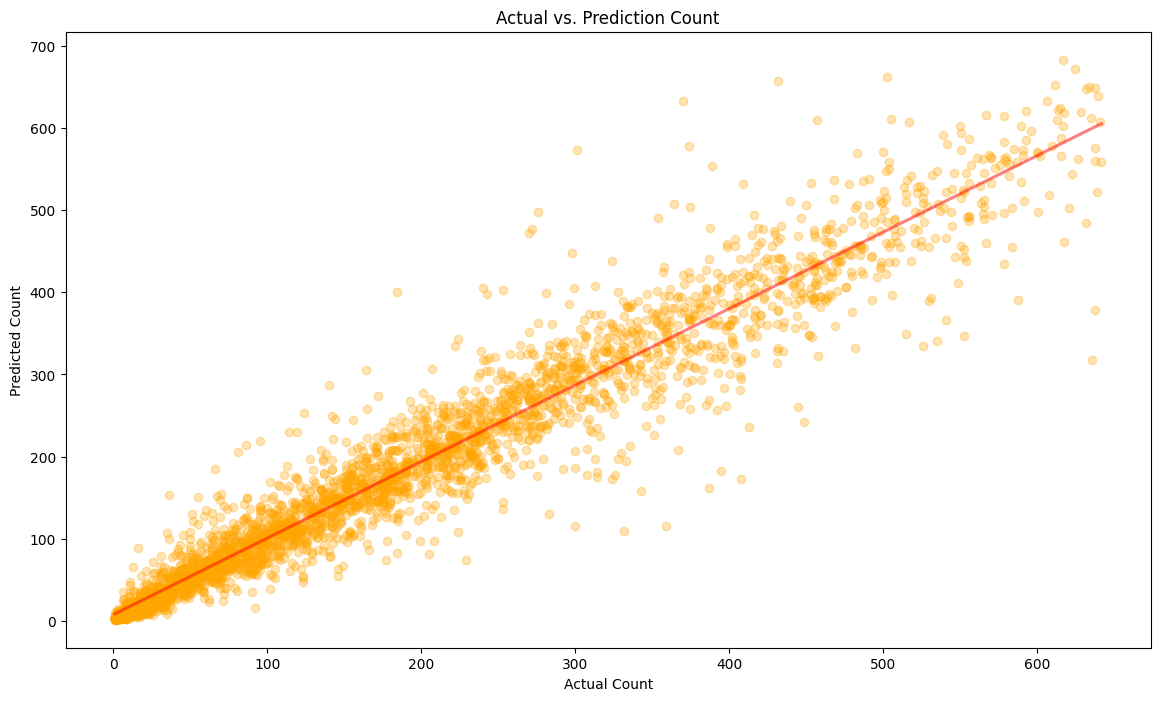

In [62]:
plt.figure(figsize=(14, 8))
sns.regplot(x=y_test, y=y_pred_xgb_tuning, ci=None, scatter_kws = {'color': 'orange', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha': 0.5}).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count')
plt.show()

Dari grafik diatas terlihat bahwa model masih mampu melkuakn prediksi dengan cukup baik hingga nilai jumlah sepeda di kisaran 600 unit. namun kita akan mencoba mengecek lebih jauh hasil metrik MAE dan MAPE dengan mengelompokan target (Count) pada data test dalam range tertentu

### **f. Feature Importances**

Text(0, 0.5, 'Features')

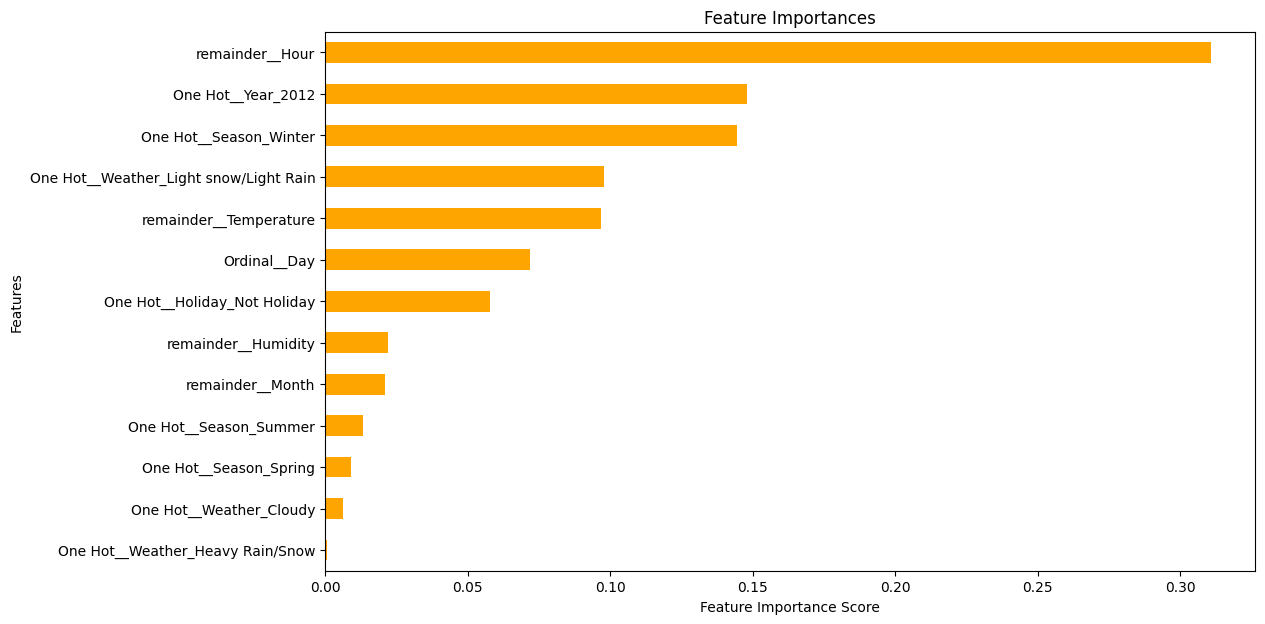

In [63]:
# Plot feature importances
xgb_tuning = randomsearch_xgb.best_estimator_

feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values()
plt.figure(figsize=(12, 7))
feature_imp.plot(kind='barh', title='Feature Importances', color='orange')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

Grafik diatas menunjukan pentingnya masing-masing fitur dalam memprediksi nilai target. Feature Importance dihitung dengan mengukur seberapa besar pengaruh masing-masing fitur terhadap kesalahan prediksi model. Terlihat bahwa :

- `Remainder_Hour` adalah fitur yang paling penting. Hal ini menunjukan bahwa orang lebih cenderung menyewa sepeda pada waktu-waktu tertentu dalam sehari, seperti jam sibuk pagi, dan jam pulang sore. Maka pemilik bisnsi dapat meningkatkan jumlah unit sepeda pada jam berangkat kerja dan jam pulang kerja.

- `One Hot__Year_2012` adalah fitur kedua paling penting. hal ini menunjukan bahwa adanya peningkatan jumlah penyewaan padan tahun 2012. Maka bisa diprediksi bahwa semakin tahun bertambah maka peningkatan penyewa menjadi bertambah juga.

- `One Hot_Season_Winter` adalah fitur ketiga paling penting. Hal ini menunjukan musim Winter menunjukan adanya penurunan drastis karena sebagian besar orang tidak keluar rumah. Dan bisa kita simpulkan bahwa musim memiliki pengaruh yang penting terhadap banyaknya penyewaan sepeda. 

## **SHAP**

In [64]:
X_train_encod = xgb_tuning[0].fit_transform(X_train)

In [65]:
features_names=transformer.get_feature_names_out()

In [66]:
X_train_encod_df = pd.DataFrame(X_train_encod).astype('float')

In [67]:
features_names.shape

(13,)

 99%|===================| 8214/8269 [01:52<00:00]        

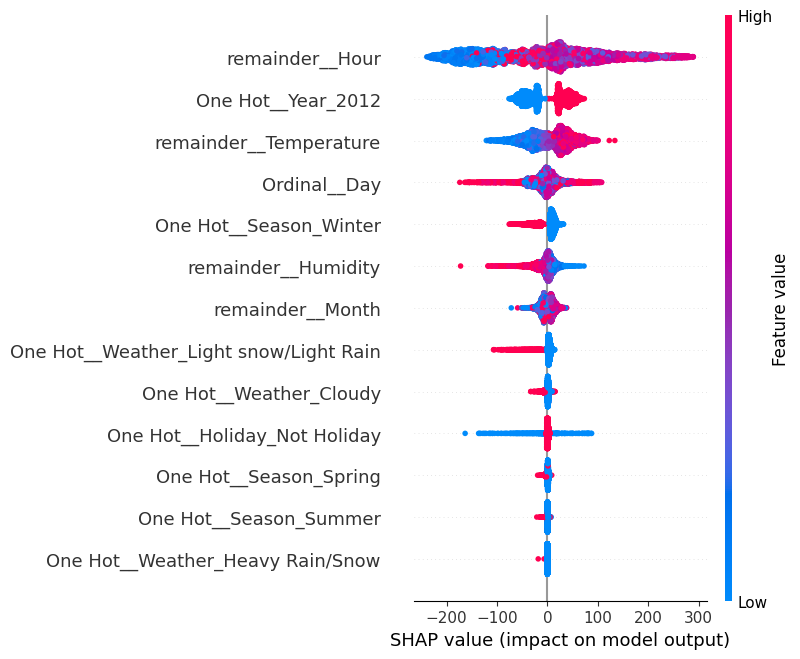

In [68]:
import shap

shap_values = shap.TreeExplainer(xgb_tuning[-1],
                                 data = X_train_encod_df,
                                 feature_dependence="independent"
                                 ).shap_values(X_train_encod_df)
                                 
shap.summary_plot(shap_values, X_train_encod_df,feature_names = features_names)

Dilihat dari grafik SHAP diatas, menunjukan bahwa :
- Remainder_hour adalah fitur yang paling penting, karena memiliki rentang Shapley yang tinggi. Ini menunjukan bahwa semakin tinggi remainder_Hournya maka semakin meningkat jumlah penyewaan sepeda, 
- One Hot_Year_2012, fitur ini menunjukan sewa sepeda pada tahun 2012 dan 2011, nilai SHAP yan gpositif menunjukan bahwa tahun 2012 cenderung meningkatkan prediksi sewa sepeda. Ini mungkin karena tahun 2012 adalah tahun olimpiade London, yang menarik banyak pengunjung ke kotadan meningkatkan permintaan sewa sepeda
- Remainder_Temperature, fitur ini menunjukan bahwa sisa suhu yang lebih tinggi cenderung meningkatkan prediksi sewa sepeda, ini mungkin karene orang-orang lebih cenderung menyewa sepeda pada cuaca cerah
- Ordinal_Day, fitur ini menunjukan hari keberapa dalam setahun. Nilai SHAP yang positif menunjukan bahwa hari-hari tertentu dalam setahun, seperti akhir pekan dan hari libur, cenderung meningkatkan 



### **g. Confusion Matrix/Residual Plot**

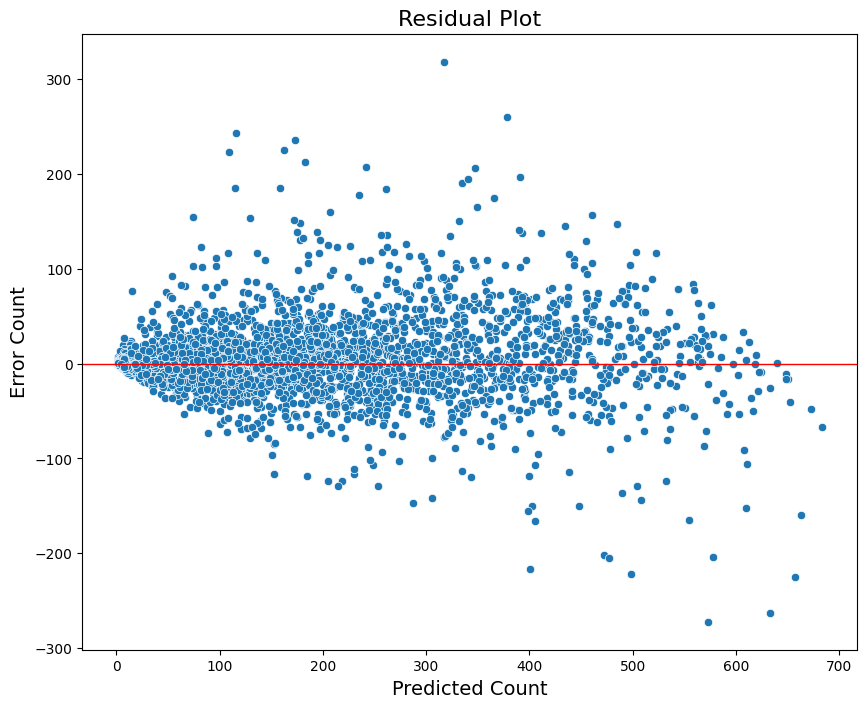

In [69]:
residuals = y_test - y_pred_xgb_tuning

# Create residual plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=y_pred_xgb_tuning, y=residuals, ax=ax)
ax.axhline(0, color='red', linestyle='-', linewidth=1)  # Add a horizontal line at y=0
ax.set_title('Residual Plot', fontsize=16)
ax.set_xlabel('Predicted Count', fontsize=14)
ax.set_ylabel('Error Count', fontsize=14)
plt.show()

Grafik residual plot menunjukan hubungan antara residual (kesalahan) dan nilai yang diprediksi. Residual adalah perbedaan antara nilai aktual dan ilai yang diprediksi oleh model.

Grafik residual yang ideal adalah garis lurus yang sejajar dengan sumu y. Hal ini menunjukan bahwa residual plot tidak sejajar dengan sumbu y, maka hal ini menunjukan bahwa ada pola dalam residual. Pola residual dapat mengindikasikan bahwa model tidak sesuai dengan data.

Dari Grafik diatas, bisa diinterpretasikan bahwa :
- Nilai residual tersebar secara acak disekitar nilai ol. Hal ini menunjukkan bahwa odel XGBoost Regressor memprediksi nilai yang akurat.
- Tidak ada pola yang jelas dalam residual. Hal ini menunjukan bahwa model XGBoost Regressor tidak terpengaruh oleh faktor-faktor yang tidak diketahui.

Selanjutnya kita akan melihat model limitasi, dimana rentang setiap model yang bisa dimasukan untuk menjaga hasil dari pemodelan


### **i. Model Limitation**

Untuk Pemodelan XGBoost Regressor memiliki model limitation agar hasil prediksi dari pemodelan ini memiliki hasil yang maksimal, dan jika melebihi limitation yang ditentukan maka hasil prediksi akan menurun. Adapun model limitation berdasarkan fitur-fitur yang mempengaruhi target (Count) yaitu :
- Fitur `Humidity` memiliki rentan nilai 0.08 sampai 1.0.
- Fitur `Temperature` memiliki rentan nilai 0.02 hingga 1.0
- fitur `Hour` memiliki rentan nilai 0 hingga 23
- fitur `Count` memiliki rentan nilai 1.0 hingga 645
- fitur `Weather` memiliki nilai `Clear`, `Cloudy`, `Light snow/Light Rain`, `Heavy Rain/Snow`
- Fitur `Holiday` memiliki nilai `Holiday` dan `Not Holiday`
- Fitur `Season` memiliki nilai `Fall`, `Spring`, `Summer`, `Winter`
- Fitur `Day` memiliki nilai `Monday`, `Tuesday`, `Wednesday`, `Thursday`, `Friday`, `Saturday`, `Sunday`
- Fitur `Month` Memiliki nilai 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
- Fitur `Year` Memiliki nilai `2011` dan `2012`

## **7. Conclusion and Recomendations**

### **a. Conclusion**

Dari hasil Benchmark Model dan Hyperparameter Tuning yang dilakukan, diperoleh model XGBoost Regressor sebagai model terbaik dengan parameter terbaik sebagai berikut :

- n_estimators : 300
- max_depth : 7
- learning_rate : 0.1

Metrik yang digunakan pada model ini adalah nilai RMSE, MAE dan MAPE. Jika dilihat dari nilai MAPE-nya sebesar 24%, model XGBoost Tuning bisa melakukan prediksi dengan kesalahan error berdasarkan MAPE sebesar 24%. maka ini berarti bahwa nilai prediksi untuk jumlah kebutuhan bike sharing akan berkisar kurang lebih 40 unit dari nilai prediksi dari model (dengan nilai yang dilatih dalam pemodelan sebesar 645). Namun tidak menutup kemungkinan juga bahwa prediksi bisa melest lebih jauh karena masih terdapat beberapa data yang nilai prediksi dan aktualnya masih menghasilkan errod yang lebih besar dari nilai RMSE.

In [70]:
display(score_before_tuning,score_after_tuning)

,RMSE,MAE,MAPE
XGB,40.675837,25.025155,0.249182


,RMSE,MAE,MAPE
XGB,39.196082,23.822828,0.244499


### **b. Recomendation**

Rekomendasi untuk memperbaiki model serta meningkatkan model :
- Melakukan Hyperparameter Tuning dengan GridSearch dan mencobe berbagai kombinasi dari berbagai parameter yang ada pada model lebih banyak lagi.
- Mencoba lebih banyak model yang termasuk metode Ensemble seperti Voting Regressor dan Stacking Regressor.
- Penambahan fitur yang lebih memiliki korelasi dengan target('Count') seperti adanya event tertentu dan jarak lokasi station dengan lokasi perkantoran , sekolah atau tempat wisata, biaya per sewa untuk menghitung keuntungan dari setiap perjalanan.
- Penambahan jumlah data, dilihat dair efektif kinerja modeling yang sampi 600 data, menunjukan masih kurangnya data yang digunakan untuk pemodelan, karena ML akan semakin bagus hasil prediksinya jika semakin banyak ML mempelajari sebuah data.

### **Save Modeling**

In [71]:
import joblib

In [72]:
# saving model

# best model
final_model = xgb_tuning

# fitting model
final_model.fit(X,y)

#save
joblib.dump(final_model, 'model_xgboost_joblib')

['model_xgboost_joblib']

In [73]:
# Load model 
model_loaded_joblib = joblib.load('model_xgboost_joblib')